In [1]:
import os,sys,string, time
from math import *
from array import array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
import joblib

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Var_list

print ('Success')


Welcome to JupyROOT 6.24/06
Success


## Reading .csv list

In [2]:
def Pandafy(path):
    cols = ['Mass','Value']
    df = pd.read_csv(path,names=cols)
    firstLine = pd.DataFrame([[df['Mass'][0],1.]],columns=cols)
    lastLine = pd.DataFrame([[df['Mass'][-1:].values[0],1.]],columns=cols)
    df = pd.concat([firstLine,df])
    df = pd.concat([df,lastLine])
    return df

## Reading in files

In [3]:
samples = ["PIENU","PS191","KEK","E949"]
print("Plotting these limits: " + str(samples))
plot_dict = {}
for sample in samples:
    plot_dict[sample] = Pandafy(Constants.limit_locs[sample])
    
uboone_top_20 = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen.csv')

uboone_70percent_sys = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen_70percent_sys.csv')

uboone_ee_current = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen_50percent_overlay_detvar.csv')

uboone_ee_80percent = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen_80percent_overlay_detvar.csv')

uboone_ee_150percent = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen_150percent_overlay_detvar.csv')

uboone_pi0_approx = Pandafy('limit_files/Flat_sys_havled_expected_pi0_mu_all_vars_logit_New.csv')

Ten_event_limit = Pandafy('limit_files/10_event_expected_mu_run3.csv')

Theorist_Pawels = Pandafy('limit_files/Reinterp_Pawels_result.csv')

T2K_recast = Pandafy('limit_files/T2K_recast_full_data.csv')

BBN = Pandafy('limit_files/BBN_Nicolo_paper.csv')

point = [150,4.26974152748967e-07]

Plotting these limits: ['PIENU', 'PS191', 'KEK', 'E949']


## Plotting limits

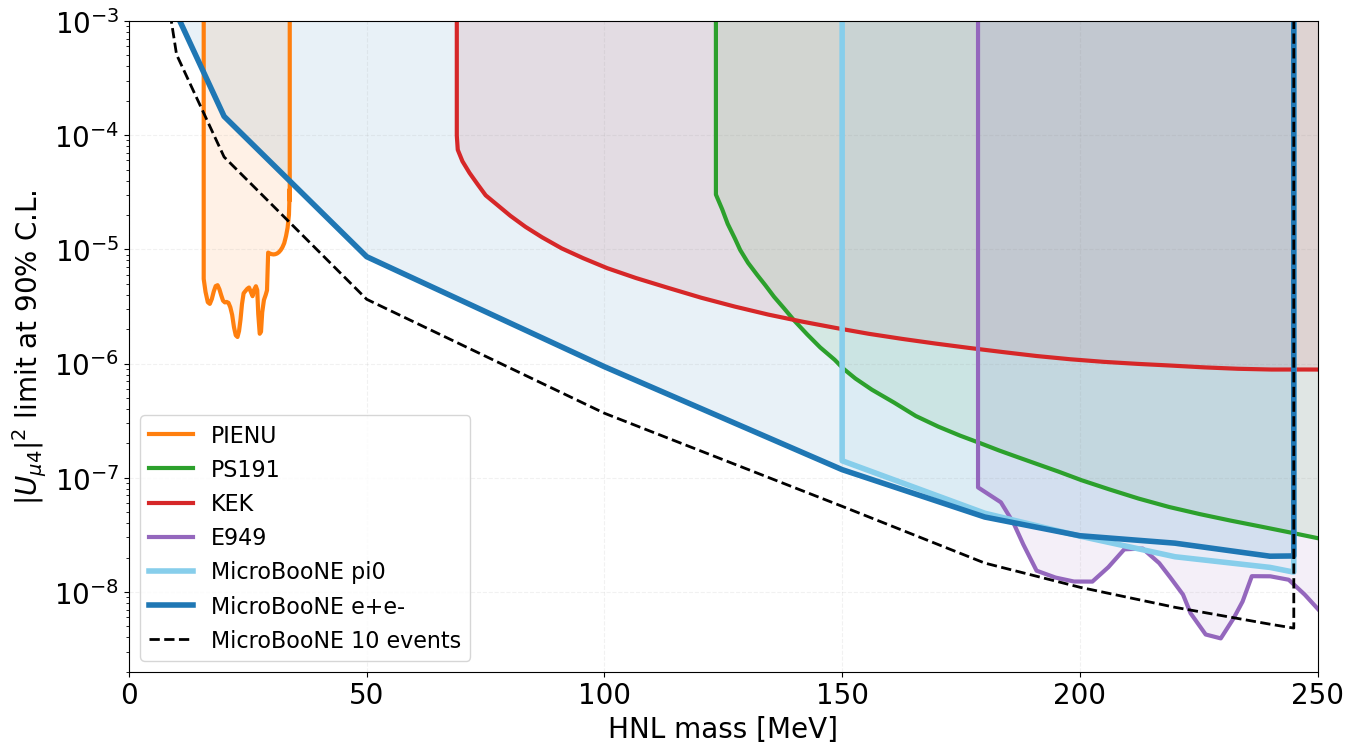

In [8]:
style_ps = '-'
style_ds = '-'
transp = 0.05

savefig = True

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)

    
# plt.plot(uboone_70percent_sys['Mass'],uboone_70percent_sys['Value'],label="MicroBooNE plus extra systematic",color="C13",lw=4)
# plt.fill_between(uboone_70percent_sys['Mass'],uboone_70percent_sys['Value'],1,color="C13",alpha=0.1)

plt.plot(uboone_pi0_approx['Mass'],uboone_pi0_approx['Value'],label="MicroBooNE pi0",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_approx['Mass'],uboone_pi0_approx['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_ee_current['Mass'],uboone_ee_current['Value'],label="MicroBooNE e+e-",color="C10",lw=4)
plt.fill_between(uboone_ee_current['Mass'],uboone_ee_current['Value'],1,color="C10",alpha=0.1)

plt.plot(Ten_event_limit['Mass'],Ten_event_limit['Value'],label="MicroBooNE 10 events",color="black",lw=2, linestyle='dashed')
# plt.fill_between(Ten_event_limit['Mass'],Ten_event_limit['Value'],1,color="black",alpha=0.1)

# plt.plot(uboone_ee_80percent['Mass'],uboone_ee_80percent['Value'],label="MicroBooNE e+e- 80%",color="grey",lw=2, linestyle='dashed')
# plt.fill_between(uboone_ee_80percent['Mass'],uboone_ee_80percent['Value'],1,color="grey",alpha=0.1)

# plt.plot(uboone_ee_150percent['Mass'],uboone_ee_150percent['Value'],label="MicroBooNE e+e- 150%",color="black",lw=2, linestyle='dashed')
# plt.fill_between(uboone_ee_150percent['Mass'],uboone_ee_150percent['Value'],1,color="black",alpha=0.1)

# plt.plot(T2K_recast['Mass'],T2K_recast['Value'],label="T2K recast full data projected",color="C6",lw=4,linestyle='dashed')
# plt.fill_between(T2K_recast['Mass'],T2K_recast['Value'],1,color="C6",alpha=0.1)

lower_lim_BBN = np.full(101, 1e-8)

# plt.plot(BBN['Mass'],BBN['Value'], label="BBN",color="C5",lw=3)
# plt.fill_between(BBN['Mass'],BBN['Value'],1,color="C5",alpha=0.1)

# plt.plot(Theorist_Pawels['Mass'],Theorist_Pawels['Value'], label="HPS recast",color="C5",lw=3)
# plt.fill_between(Theorist_Pawels['Mass'],Theorist_Pawels['Value'],1,color="C5",alpha=0.1)

# y2=1e-8,

# plt.plot(150, 4.26974152748967e-07, marker="o",markersize=10,markeredgecolor="C13",markerfacecolor="C13", label="pi0 run1")

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
# plt.ylim(1e-8,1e-3)
plt.ylim(2e-9,1e-3)
#plt.xlim(0,0.45)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left")
plt.tight_layout()

if savefig == True:
    name = "10event_run3_Comparison"
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [6]:
# plt.figure(figsize=(14,8),facecolor='white',dpi=100)

arr_50_percent = np.array(uboone_ee_current)
arr_150_percent = np.array(uboone_ee_150percent)

ratio = np.divide(arr_50_percent, arr_150_percent)
print(ratio)


[[1.         1.        ]
 [1.         0.78106459]
 [1.         0.80136765]
 [1.         0.76319287]
 [1.         0.75626221]
 [1.         0.75207571]
 [1.         0.7471156 ]
 [1.         0.75098465]
 [1.         0.75389218]
 [1.         0.78717263]
 [1.         0.80850297]
 [1.         0.75032383]
 [1.         1.        ]]


In [26]:
#PLOT ratio of stats only to systematic
print(BBN['Value'])
print(type(BBN))
lower_lim = np.full(101, 1e-8)

0      1.000000e+00
0      9.417911e-03
1      8.797311e-03
2      8.014944e-03
3      7.184949e-03
           ...     
98     3.512616e-09
99     2.988943e-09
100    2.407377e-09
101    2.126507e-09
0      1.000000e+00
Name: Value, Length: 104, dtype: float64
<class 'pandas.core.frame.DataFrame'>
